Make a linear Regression model
The model would be predicting The age of a given passenger using all the other known attributes of the person
Train with 70 percent of the data and take the y column as Age
You CAN NOT use any library to make the logistic regression model, you can use only numpy and pandas. The model has to be built from the scratch

C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\LENOVO\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


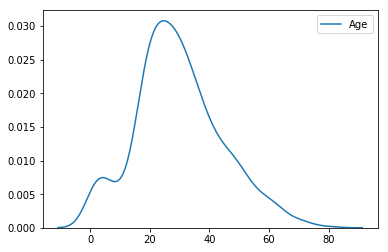

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('titanic.csv')



import seaborn as sns
sns.kdeplot(df['Age'])
#Right skewed


In [3]:
df['Age']=df['Age'].fillna(value=df['Age'].median())
#df.isnull().sum()
#df['Embarked'].value_counts()
df['Embarked']=df['Embarked'].fillna(value='S')    #As Cabin as maximum entries as null we'll ignore it
df=df.drop('Cabin',axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [4]:
#sns.pairplot(df)

In [5]:
df=pd.get_dummies(df,columns=['Sex','Embarked','Pclass'])
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1
5,6,0,"Moran, Mr. James",28.0,0,0,330877,8.4583,0,1,0,1,0,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,0,1,0,0,1,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,0,1,0,0,1,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,1,0,0,0,1,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,1,0,1,0,0,0,1,0


In [9]:
df1=df.drop('Ticket',axis=1)

In [10]:
#df1=df1.drop('Name',axis=1)

In [11]:
df1

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1,0,0,1
5,6,0,"Moran, Mr. James",28.0,0,0,8.4583,0,1,0,1,0,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,51.8625,0,1,0,0,1,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",2.0,3,1,21.0750,0,1,0,0,1,0,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,11.1333,1,0,0,0,1,0,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,30.0708,1,0,1,0,0,0,1,0


C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


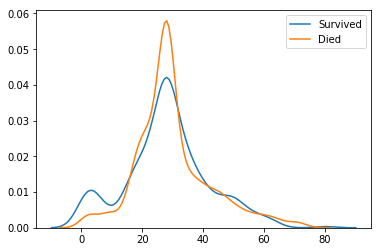

In [12]:
sns.kdeplot(df1['Age'][df1.Survived==1])
sns.kdeplot(df1['Age'][df1.Survived==0])
plt.legend(['Survived','Died'])

In [13]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.dot(theta, X[i]))
    h = h.reshape(X.shape[0])
    return h

In [14]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0])*sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/(X.shape[0])) *sum((h-y)*X.transpose()[j])
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

In [15]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
   
    theta = np.zeros(n+1)
    
    h = hypothesis(theta, X, n)
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

In [43]:
y_train=df1['Age'][0:625]
X_train=df1[['SibSp','Fare','Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3']][0:625]

In [44]:
y_true=df1['Age'][624:]

In [45]:
theta, cost = linear_regression(X_train, y_train, 0.001, 11000)
theta

array([[15.21571733, -2.57339937,  0.04989233,  5.51237567,  9.70334166,
         5.73479034,  4.6482681 ,  4.83265889]])

In [47]:

i=0
h=np.ones(267)
for u in range(624,891):
    a=np.array(df1.iloc[u].drop(labels=['PassengerId','Age','Survived','Name','Embarked_C','Embarked_Q','Embarked_S','Parch']))
    a=np.insert(a,0,1)
    mul=a*theta
    h[i]=np.sum(mul)
    u=u+1
    i=i+1
    


In [48]:
h

array([30.55498438, 32.26640932, 30.18349735, 30.35240448, 30.14565773,
       30.13755023, 32.1506192 , 30.10366835, 32.17556537, 30.65384933,
       19.23254974, 26.02496137, 30.14711459, 28.30360135, 27.54085369,
       27.98158501, 30.14358221, 29.92042173, 19.23254974, 32.57042492,
       21.37479458, 31.90864845, 30.14565773, 32.42502701, 30.12840497,
       25.93743897, 30.14565773, 26.52388466, 30.17247486, 25.95136891,
       25.89752511, 28.08761452, 30.14565773, 23.76068361, 30.21592736,
       36.30540289, 32.17516035, 30.11218996, 31.9304693 , 30.1257008 ,
       27.57371522, 28.08761452, 30.21592736, 30.13963074, 30.15335113,
       26.48388507, 24.74876255, 30.67485106, 30.09119654, 30.21592736,
       29.56732709, 30.13963074, 30.15335113, 26.05177722, 25.32730274,
       56.21514631, 25.96675071, 34.48204782, 30.21197462, 19.22467124,
       28.93972854, 29.06841084, 21.43822219, 30.25916278, 30.1406685 ,
       37.0070034 , 30.92431271, 26.23014229, 32.57042492, 30.11

In [49]:
e=np.array(y_true)
e

array([21.  , 61.  , 57.  , 21.  , 26.  , 28.  , 80.  , 51.  , 32.  ,
       28.  ,  9.  , 28.  , 32.  , 31.  , 41.  , 28.  , 20.  , 24.  ,
        2.  , 28.  ,  0.75, 48.  , 19.  , 56.  , 28.  , 23.  , 28.  ,
       18.  , 21.  , 28.  , 18.  , 24.  , 28.  , 32.  , 23.  , 58.  ,
       50.  , 40.  , 47.  , 36.  , 20.  , 32.  , 25.  , 28.  , 43.  ,
       28.  , 40.  , 31.  , 70.  , 31.  , 28.  , 18.  , 24.5 , 18.  ,
       43.  , 36.  , 28.  , 27.  , 20.  , 14.  , 60.  , 25.  , 14.  ,
       19.  , 18.  , 15.  , 31.  ,  4.  , 28.  , 25.  , 60.  , 52.  ,
       44.  , 28.  , 49.  , 42.  , 18.  , 35.  , 18.  , 25.  , 26.  ,
       39.  , 45.  , 42.  , 22.  , 28.  , 24.  , 28.  , 48.  , 29.  ,
       52.  , 19.  , 38.  , 27.  , 28.  , 33.  ,  6.  , 17.  , 34.  ,
       50.  , 27.  , 20.  , 30.  , 28.  , 25.  , 25.  , 29.  , 11.  ,
       28.  , 23.  , 23.  , 28.5 , 48.  , 35.  , 28.  , 28.  , 28.  ,
       36.  , 21.  , 24.  , 31.  , 70.  , 16.  , 30.  , 19.  , 31.  ,
        4.  ,  6.  ,

In [50]:
h-e

array([ 9.55498438e+00, -2.87335907e+01, -2.68165026e+01,  9.35240448e+00,
        4.14565773e+00,  2.13755023e+00, -4.78493808e+01, -2.08963317e+01,
        1.75565365e-01,  2.65384933e+00,  1.02325497e+01, -1.97503863e+00,
       -1.85288541e+00, -2.69639865e+00, -1.34591463e+01, -1.84149949e-02,
        1.01435822e+01,  5.92042173e+00,  1.72325497e+01,  4.57042492e+00,
        2.06247946e+01, -1.60913516e+01,  1.11456577e+01, -2.35749730e+01,
        2.12840497e+00,  2.93743897e+00,  2.14565773e+00,  8.52388466e+00,
        9.17247486e+00, -2.04863109e+00,  7.89752511e+00,  4.08761452e+00,
        2.14565773e+00, -8.23931639e+00,  7.21592736e+00, -2.16945971e+01,
       -1.78248397e+01, -9.88781004e+00, -1.50695307e+01, -5.87429920e+00,
        7.57371522e+00, -3.91238548e+00,  5.21592736e+00,  2.13963074e+00,
       -1.28466489e+01, -1.51611493e+00, -1.52512375e+01, -3.25148936e-01,
       -3.99088035e+01, -7.84072636e-01,  1.56732709e+00,  1.21396307e+01,
        5.65335113e+00,  

In [51]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [52]:
mean_absolute_percentage_error(e, h)

135.22082324376876

Text(0, 0.5, 'Cost')

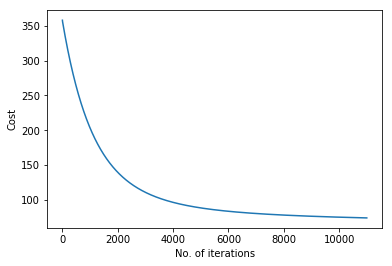

In [53]:
cost = list(cost)
n_iterations = [x for x in range(1,11001)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

In [54]:
from sklearn import metrics
metrics.r2_score(e, h, sample_weight=None)

0.05101291751487125

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#data = pd.read_csv("D://Blogs//train.csv")
A = df1[['SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Pclass_1','Pclass_2','Pclass_3']][0:625]  #independent columns
b = df1['Survived'][0:625]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(A,b)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(A.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         Specs        Score
2         Fare  1955.359965
3   Sex_female   122.188829
4     Sex_male    71.638628
8     Pclass_1    26.772958
10    Pclass_3    26.589480
5   Embarked_C     9.283915
1        Parch     8.772465
9     Pclass_2     8.078187
7   Embarked_S     3.866358
6   Embarked_Q     1.172295


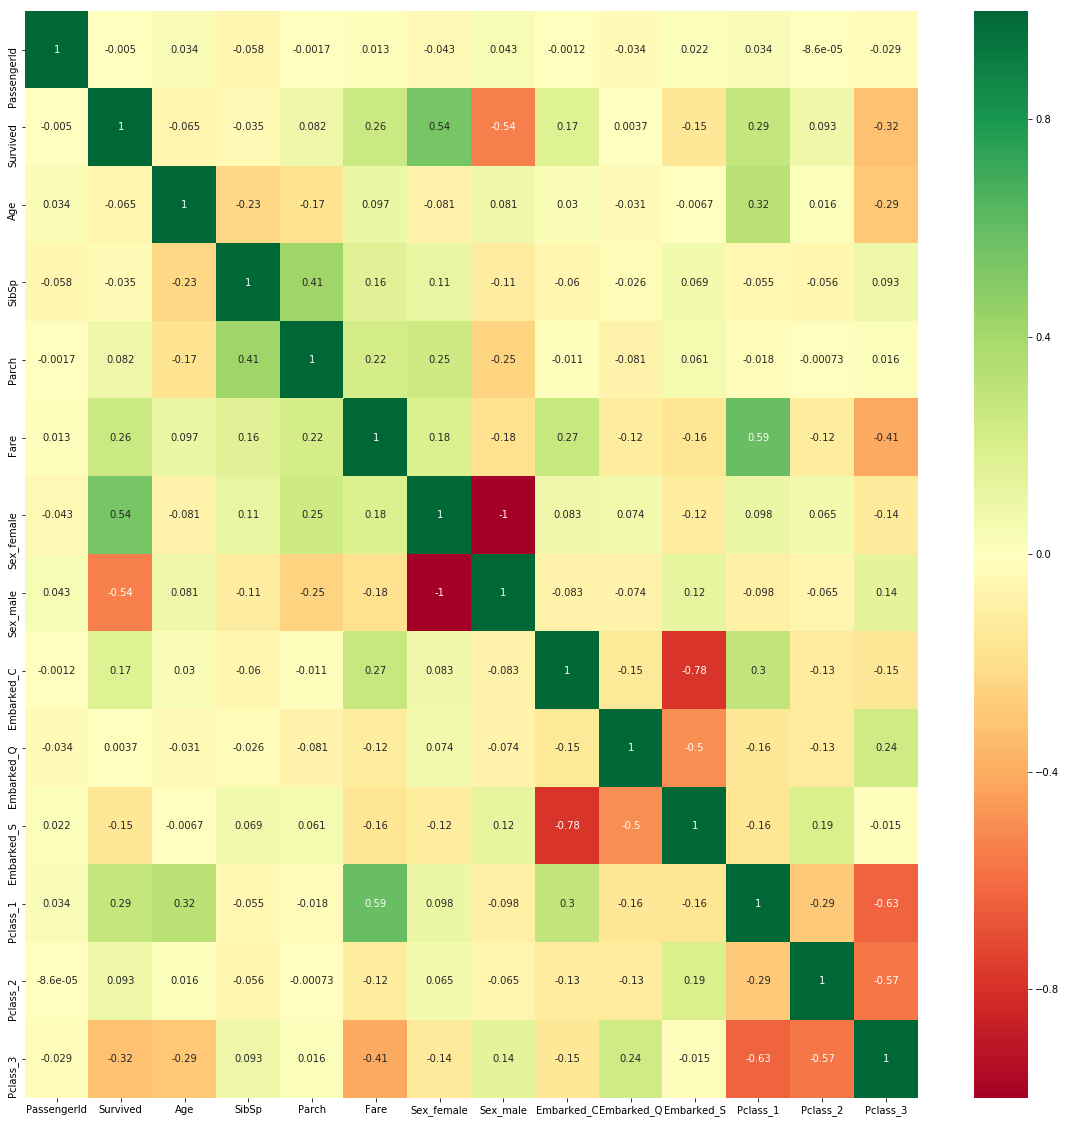

In [55]:
E = df1[['SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Pclass_1','Pclass_2','Pclass_3']][0:625]  #independent columns
f = df1['Survived']    #target column i.e price range
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")